# Prepare files for web demo

In [1]:
from inference.face_voice_inference import FaceStyleInference
from pathlib import Path
import IPython
from inference.tacotron_loader import TacotronLoader
from parallel_wavegan.utils import load_model, download_pretrained_model
import soundfile as sf
import torch
import numpy as np
from random import shuffle
from Resemblyzer.demo_utils import plot_2projections, plot_projections
from espnet2.tasks.tts import TTSTask
from mpl_toolkits.mplot3d import Axes3D
from sklearn.manifold import TSNE
from umap.umap_ import UMAP
from PIL import Image
import matplotlib.pyplot as plt
from datetime import datetime 

### Load models

In [2]:
face_style = FaceStyleInference(
    facevoice_model_path="../src/models/weights/face_style_weights.ckpt",
    facenet_pretrained="casia-webface"
)
face_model = face_style.facestyle
baseline_tacotron, preprocess = TacotronLoader.load()

- Loaded Facestyle model from : ../results/silver-star-64/facestyle-epoch=09-val_loss=0.00.ckpt
  using finetuned Facenet model from ../results/facenet/spring-glitter-9/facestyle-epoch=14-val_loss=0.07.ckpt
- Loaded Tacotron2 model
- Loaded ParallelWaveGAN


### Inference on robot faces
Note that images were pre-scaled to 160x160 because MTCNN does not recognise face here and thus cannot crop.

Ground truth image:


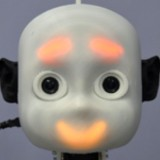

Face to style embedding:


Ground truth image:


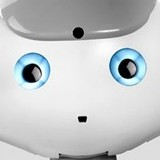

Face to style embedding:


Ground truth image:


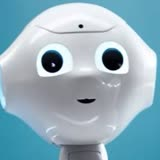

Face to style embedding:


In [4]:
names = ["nico", "nao", "pepper"]
for name in names:
    path = Path(f"../data/images/other/{name}_resized.jpg")
    text = f"Hello. My name is {name}. How are you?"
    speech, *_ = face_style.inference(text, path)
    print("Ground truth image:")
    IPython.display.display(IPython.display.Image(filename=path))
    print("Face to style embedding:")
    IPython.display.display(IPython.display.Audio(speech, rate=24000))
    sf.write(f"./results/robots/{name}_voice.wav", speech, 24000)

## Let model read paper abstract

In [8]:
start_time = datetime.now() 
path = Path(f"../data/images/other/3ogs.jpg")
text = """The existence of a learnable cross modal association between a person's face and their voice is recently becoming more and more evident,
This provides the basis for the task of target speaker text to speech synthesis from face reference,
In this paper, we approach this task by proposing a cross modal model architecture combining existing unimodal models,
We use Tahcotron 2 multi speaker text to speech with auditory speaker embeddings based on Global Style Tokens,
We transfer learn a Face Net face encoder to predict these embeddings from a static face image reference instead of a voice reference
and thus predict a speaker's voice and speaking characteristics from their face,
Unlike Face to Speech, the only previous work on this task, we use pretrained and openly available
models. This approach enables high-quality speech synthesis and allows for an easily extensible model architecture,
Experimental results show good matching
ability while retaining better voice naturalness than Face to Speech,
We examine the limitations of our model and discuss multiple possible avenues
of improvement for future work."""
speech, img, *_ = face_style.inference(text, path)
print("Face to style embedding:")
IPython.display.display(IPython.display.Audio(speech, rate=24000))
sf.write(f"./results/robots/3ogs_reading_abstract3.wav", speech, 24000)
print('Time elapsed (hh:mm:ss.ms) {}'.format(datetime.now() - start_time))

Face to style embedding:


Time elapsed (hh:mm:ss.ms) 0:00:06.601910
